In [14]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pi = np.pi

In [15]:
df = pd.read_table('FET.csv', sep=',', engine='python', names=('Vgs','Vds', 'A', 'InR', 'expo'), skiprows=1)

In [18]:
df['expo'] = df['expo'].astype(np.float64)
df['A'] = df['A']*pow(10, df['expo'])
df['Ads'] = df['A'] - df['Vds']/df['InR']

In [21]:
# Vgsごとにグラフを分ける

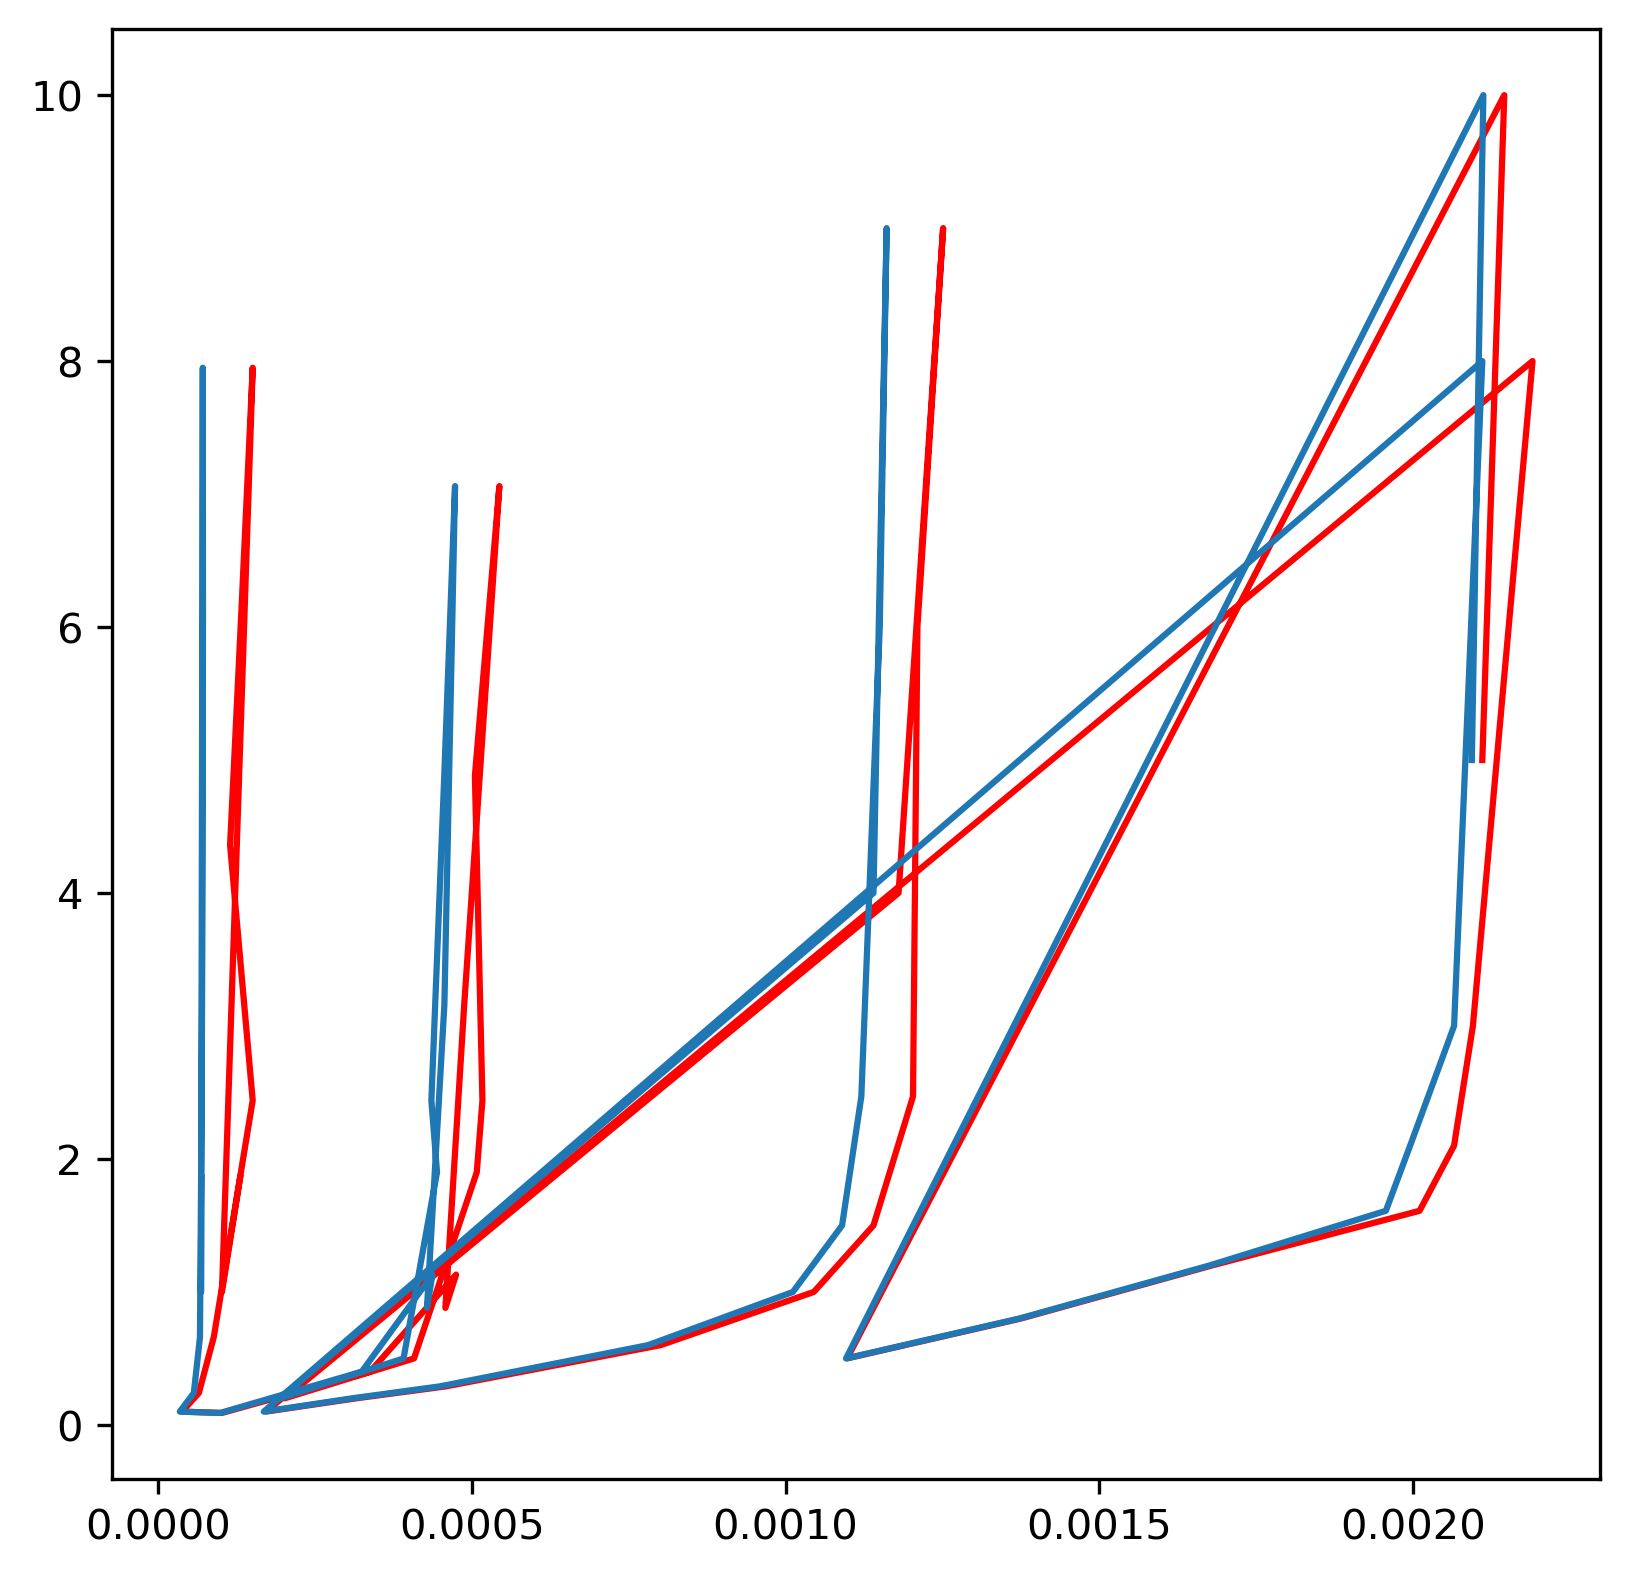

In [22]:
fig = plt.figure(figsize=(6.4, 6.4), dpi=300)
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)

ax.plot(df['A'], df['Vds'], color='red', linewidth=1.5)
ax.plot(df['Ads'], df['Vds'], linewidth=1.5)

In [46]:
# pandasはこのようにグループ分けができる！
groups = df.groupby(df.Vgs) # Vgsで場合分けをする
data00 = groups.get_group(0.0)
data04 = groups.get_group(0.4)
data08 = groups.get_group(0.8)
data12 = groups.get_group(1.2)

data00c = data00.sort_values('Vds') # inplaceをTrueにすることで元のオブジェクトも変更される
data04c = data04.sort_values('Vds')
data08c = data08.sort_values('Vds')
data12c = data12.sort_values('Vds')

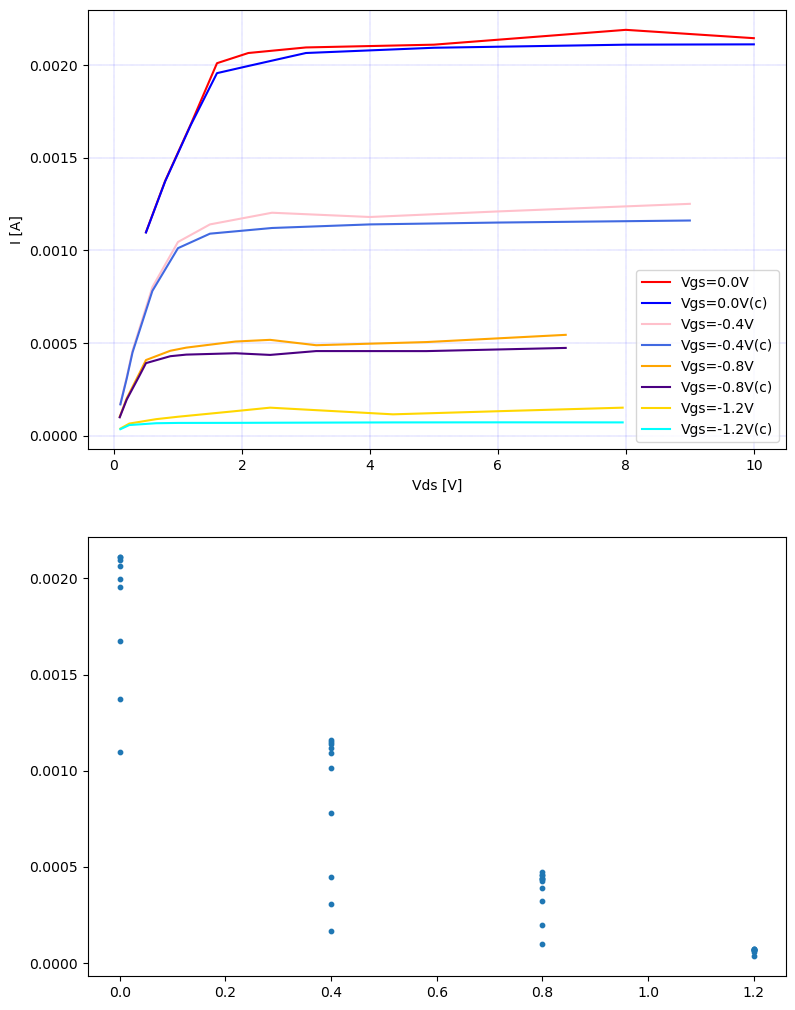

In [104]:
fig1 = plt.figure(figsize=(9.0, 12.8), dpi=100)
fig1.patch.set_facecolor('white')
ax1 = fig1.add_subplot(211) # 1行1列の枠組みを作って、その１番目の図という意味
ax2 = fig1.add_subplot(212)
# ax2 = fig1.add_subplot(222)
# ax3 = fig1.add_subplot(223)
# ax4 = fig1.add_subplot(224)

ax1.plot(data00c['Vds'], data00c['A'], color='red', linewidth=1.5, label='Vgs=0.0V')
ax1.plot(data00c['Vds'], data00c['Ads'], color='blue', linewidth=1.5, label='Vgs=0.0V(c)')
ax1.plot(data04c['Vds'], data04c['A'], color='pink', linewidth=1.5, label='Vgs=-0.4V')
ax1.plot(data04c['Vds'], data04c['Ads'], color='royalblue', linewidth=1.5, label='Vgs=-0.4V(c)')
ax1.plot(data08c['Vds'], data08c['A'], color='orange', linewidth=1.5, label='Vgs=-0.8V')
ax1.plot(data08c['Vds'], data08c['Ads'], color='indigo', linewidth=1.5, label='Vgs=-0.8V(c)')
ax1.plot(data12c['Vds'], data12c['A'], color='gold', linewidth=1.5, label='Vgs=-1.2V')
ax1.plot(data12c['Vds'], data12c['Ads'], color='cyan', linewidth=1.5, label='Vgs=-1.2V(c)')
ax1.set_xlabel('Vds [V]')
ax1.set_ylabel('I [A]')
ax1.grid(which='both', axis='both', color='blue', alpha=1.0, linestyle='--', linewidth=0.15)
ax1.legend()

# ドレイン・ソース間電圧Vdsを一定に保って相互コンダクタンスgmを求めたいが、そのような実験はやってなかったから難しそう
ax2.scatter(df['Vgs'], df['Ads'], s=10)

In [100]:
print(data00)
print(data04)
print(data08)
print(data12)

   Vgs    Vds         A       InR  expo       Ads
0  0.0   5.00  0.002110  300000.0  -6.0  0.002093
1  0.0  10.00  0.002145  300000.0  -6.0  0.002112
2  0.0   0.50  0.001098  300000.0  -6.0  0.001096
3  0.0   0.80  0.001375  300000.0  -6.0  0.001372
4  0.0   1.20  0.001680  300000.0  -6.0  0.001676
5  0.0   1.61  0.002010   30000.0  -6.0  0.001956
6  0.0   2.10  0.002065   30000.0  -6.0  0.001995
7  0.0   3.00  0.002095  100000.0  -6.0  0.002065
8  0.0   8.00  0.002190  100000.0  -6.0  0.002110
    Vgs   Vds         A       InR  expo       Ads
9   0.4  0.10  0.000172   30000.0  -6.0  0.000169
10  0.4  0.20  0.000316   30000.0  -6.0  0.000309
11  0.4  0.29  0.000459   30000.0  -6.0  0.000449
12  0.4  0.60  0.000801   30000.0  -6.0  0.000781
13  0.4  1.00  0.001045   30000.0  -6.0  0.001012
14  0.4  1.50  0.001140   30000.0  -6.0  0.001090
15  0.4  2.47  0.001203   30000.0  -6.0  0.001121
16  0.4  6.00  0.001210  100000.0  -6.0  0.001150
17  0.4  9.00  0.001251  100000.0  -6.0  0.001161


In [ ]:
g00 = 